<h1 style="text-align: center;"><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set includes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# Recognizing and Understanding Data

In [3]:
# !gdown --id 1Qm7Lp95C9E9mqUD1m8LNf_UkfctXvEGB

In [4]:
# import zipfile
# with zipfile.ZipFile("/kaggle/input/cat-dog/cat_dog_data.zip", 'r') as zip:
#  # printing all the contents of the zip file 
# #     zip.printdir()
# #     print('Extracting all the files now...') 
#     zip.extractall() 
#     print('Done!')

In [5]:
my_data_dir = '/kaggle/input/cat-dog/data'
val_path = my_data_dir+'/validation/'
train_path = my_data_dir+'/train/'
test_path = my_data_dir+'/test/'

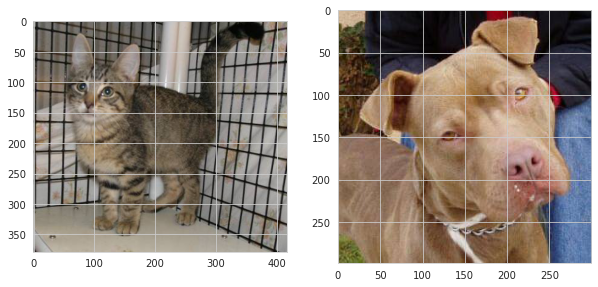

In [6]:
cat1=imread(train_path+'cat'+'/cat.4593.jpg')
dog1=imread(train_path+'dog'+'/dog.10086.jpg')

plt.subplot(1,2,1)
plt.imshow(cat1)
plt.subplot(1,2,2)
plt.imshow(dog1)

In [7]:
class_names = os.listdir(train_path)

Image shape: (375, 499, 3)
Image shape: (424, 499, 3)
Image shape: (349, 350, 3)
Image shape: (360, 479, 3)
Image shape: (288, 359, 3)
Image shape: (200, 199, 3)
Image shape: (235, 312, 3)
Image shape: (368, 280, 3)
Image shape: (375, 499, 3)


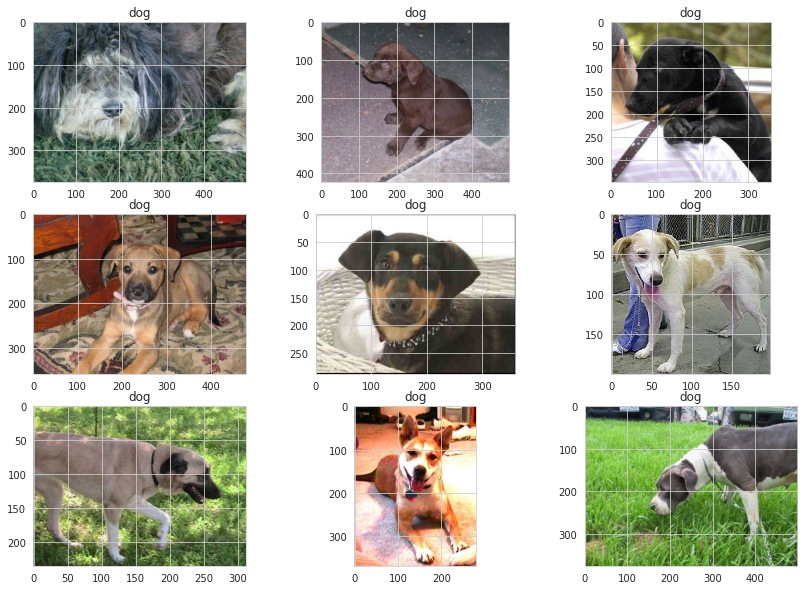

In [8]:
import random

def view_random_image(target_dir, target_class, number=9):
    plt.figure(figsize=(14,10))
    for i in range(number):
        target_folder = target_dir+target_class
        random_image = random.sample(os.listdir(target_folder), 1)
        img = imread(target_folder + "/" + random_image[0])
        plt.subplot(3,3,i+1)
        plt.imshow(img)
        plt.title(target_class);
        print(f"Image shape: {img.shape}") # show the shape of the image

img = view_random_image(target_dir=train_path, target_class=random.choice(class_names))

# Data Preprocessing

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


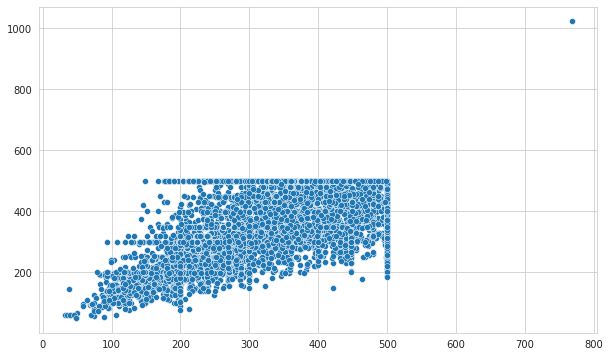

In [9]:
x = [imread(train_path+'cat/'+image).shape[0] for image in os.listdir(train_path+'cat')]
y = [imread(train_path+'cat/'+image).shape[1] for image in os.listdir(train_path+'cat')]
sns.scatterplot(x,y);

In [10]:
np.mean(x), np.median(x)

(356.46712, 374.0)

In [11]:
np.mean(y), np.median(y)

(410.52264, 470.0)

# Image Data Generator

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 15 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.2, # Zoom in by 10% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
image_gen2 = ImageDataGenerator(rescale=1/255) # For validation data

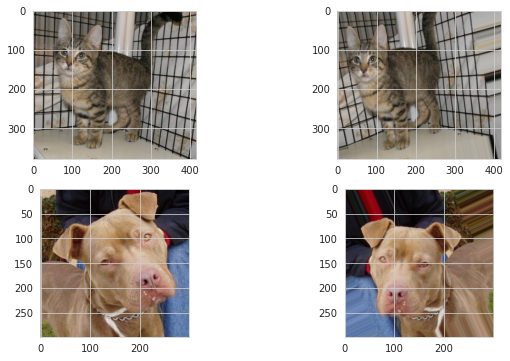

In [13]:
plt.subplot(2,2,1)
plt.imshow(cat1)
plt.subplot(2,2,2)
plt.imshow(image_gen.random_transform(cat1))
plt.subplot(2,2,3)
plt.imshow(dog1)
plt.subplot(2,2,4)
plt.imshow(image_gen.random_transform(dog1))

#Flow From Directory

In [14]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=(128,128), # image_shape = (128,128,3)
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='binary', shuffle=True, seed=42)

val_image_gen = image_gen2.flow_from_directory(val_path,
                                              target_size=(128,128),
                                              color_mode='rgb',
                                              batch_size=32,
                                              class_mode='binary', shuffle=True, seed=42)

# In image validation data there is no image gen.

Found 17526 images belonging to 2 classes.
Found 2290 images belonging to 2 classes.


# Model1

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model1 = Sequential()

model1.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(128,128,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(128))
model1.add(Activation('relu'))

model1.add(Dense(64))
model1.add(Activation('relu'))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)


In [17]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)      

In [18]:
model1.fit(train_image_gen, epochs=15, steps_per_epoch=len(train_image_gen), validation_data=val_image_gen, 
           validation_steps=len(val_image_gen), callbacks=[early_stop])

2022-10-11 15:35:48.292839: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-10-11 15:35:50.618687: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


548/548 [==============================] - 151s 261ms/step - loss: 0.5902 - accuracy: 0.7186 - val_loss: 0.6316 - val_accuracy: 0.6734
Epoch 2/15
548/548 [==============================] - 126s 229ms/step - loss: 0.5172 - accuracy: 0.7560 - val_loss: 0.5602 - val_accuracy: 0.7293
Epoch 3/15
548/548 [==============================] - 126s 229ms/step - loss: 0.4784 - accuracy: 0.7792 - val_loss: 0.4869 - val_accuracy: 0.7537
Epoch 4/15
548/548 [==============================] - 127s 232ms/step - loss: 0.4545 - accuracy: 0.7956 - val_loss: 0.4516 - val_accuracy: 0.7917
Epoch 5/15
548/548 [==============================] - 126s 229ms/step - loss: 0.4338 - accuracy: 0.8054 - val_loss: 0.6070 - val_accuracy: 0.7310
Epoch 6/15
548/548 [==============================] - 124s 226ms/step - loss: 0.4153 - accuracy: 0.8157 - val_loss: 0.4626 - val_accuracy: 0.7891
Epoch 7/15
548/548 [==============================] - 124s 227ms/step - loss: 0.4024 - accuracy: 0.8233 - val_loss: 0.4059 - val_accura

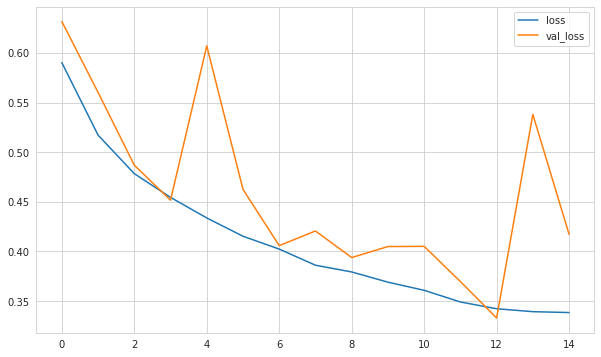

In [19]:
summary1 = pd.DataFrame(model1.history.history)
summary1[["loss", "val_loss"]].plot();

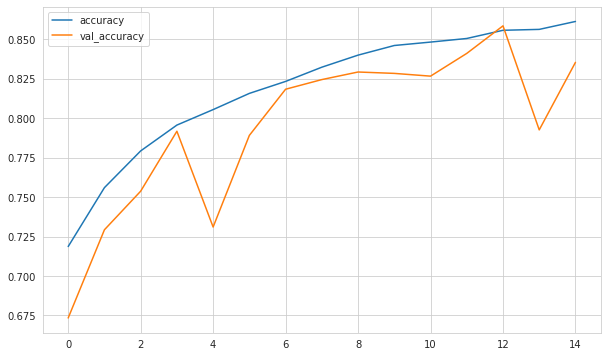

In [20]:
summary1[["accuracy", "val_accuracy"]].plot();

# Model2

In [22]:
model2 = Sequential()

model2.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(128,128,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(128))
model2.add(Activation('relu'))

model2.add(Dense(128))
model2.add(Activation('relu'))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights = True)

model2.fit(train_image_gen, epochs=15, steps_per_epoch=len(train_image_gen), validation_data=val_image_gen, 
           validation_steps=len(val_image_gen), callbacks=[early_stop])

Epoch 1/15
548/548 [==============================] - 128s 232ms/step - loss: 0.5936 - accuracy: 0.7325 - val_loss: 0.7394 - val_accuracy: 0.6511
Epoch 2/15
548/548 [==============================] - 126s 230ms/step - loss: 0.4748 - accuracy: 0.7858 - val_loss: 0.7969 - val_accuracy: 0.6655
Epoch 3/15
548/548 [==============================] - 125s 229ms/step - loss: 0.4234 - accuracy: 0.8082 - val_loss: 1.1207 - val_accuracy: 0.6463
Epoch 4/15
548/548 [==============================] - 125s 228ms/step - loss: 0.3879 - accuracy: 0.8293 - val_loss: 0.5083 - val_accuracy: 0.7891
Epoch 5/15
548/548 [==============================] - 130s 238ms/step - loss: 0.3610 - accuracy: 0.8477 - val_loss: 1.1571 - val_accuracy: 0.7913
Epoch 6/15
548/548 [==============================] - 128s 234ms/step - loss: 0.3377 - accuracy: 0.8580 - val_loss: 0.5155 - val_accuracy: 0.8249
Epoch 7/15
548/548 [==============================] - 126s 231ms/step - loss: 0.3321 - accuracy: 0.8634 - val_loss: 0.7007 -

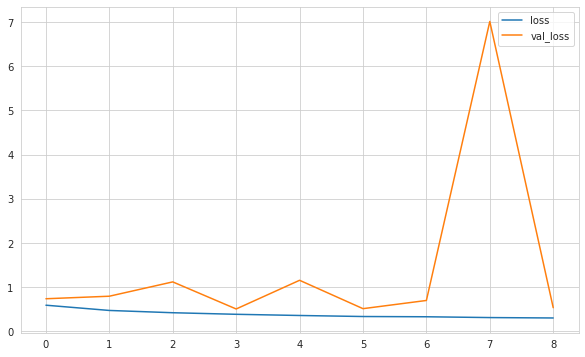

In [23]:
summary2 = pd.DataFrame(model2.history.history)
summary2[["loss", "val_loss"]].plot();

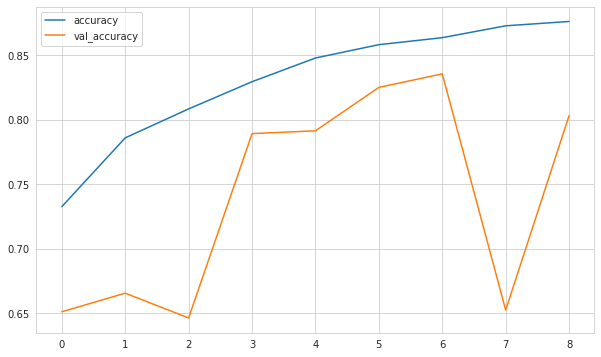

In [24]:
summary2[["accuracy", "val_accuracy"]].plot();

# Model3

In [25]:
model3 = Sequential()

model3.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=(128,128,3), activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(128))
model3.add(Activation('relu'))

model3.add(Dense(128))
model3.add(Activation('relu'))

model3.add(Dense(1))
model3.add(Activation('sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights = True)

model3.fit(train_image_gen, epochs=15, steps_per_epoch=len(train_image_gen), validation_data=val_image_gen, 
           validation_steps=len(val_image_gen), callbacks=[early_stop])

Epoch 1/15
548/548 [==============================] - 128s 231ms/step - loss: 0.6530 - accuracy: 0.6996 - val_loss: 1.1790 - val_accuracy: 0.5738
Epoch 2/15
548/548 [==============================] - 128s 233ms/step - loss: 0.5285 - accuracy: 0.7588 - val_loss: 0.6344 - val_accuracy: 0.6834
Epoch 3/15
548/548 [==============================] - 128s 234ms/step - loss: 0.4594 - accuracy: 0.7916 - val_loss: 0.5234 - val_accuracy: 0.7847
Epoch 4/15
548/548 [==============================] - 127s 231ms/step - loss: 0.4096 - accuracy: 0.8180 - val_loss: 0.7680 - val_accuracy: 0.7266
Epoch 5/15
548/548 [==============================] - 127s 232ms/step - loss: 0.3705 - accuracy: 0.8384 - val_loss: 0.4775 - val_accuracy: 0.7707


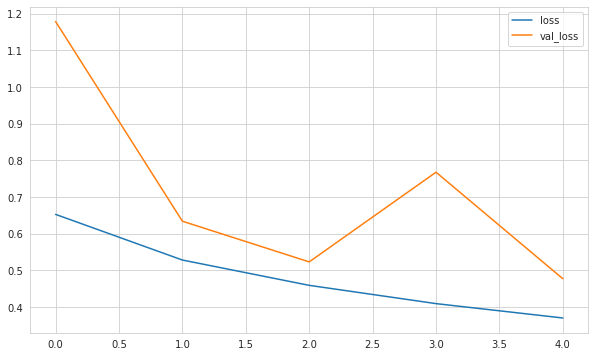

In [26]:
summary3 = pd.DataFrame(model3.history.history)
summary3[["loss", "val_loss"]].plot();

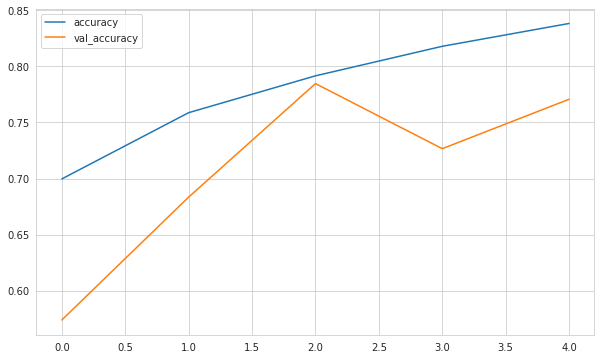

In [27]:
summary3[["accuracy", "val_accuracy"]].plot();

# Model 4

In [29]:
model4 = Sequential()

model4.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=(128,128,3), activation='relu'))
model4.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))

model4.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())

model4.add(Dense(128))
model4.add(Activation('relu'))

model4.add(Dense(128))
model4.add(Activation('relu'))

model4.add(Dense(1))
model4.add(Activation('sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights = True)

model4.fit(train_image_gen, epochs=15, steps_per_epoch=len(train_image_gen), validation_data=val_image_gen, 
           validation_steps=len(val_image_gen), callbacks=[early_stop])

Epoch 1/15
548/548 [==============================] - 132s 239ms/step - loss: 0.6152 - accuracy: 0.7113 - val_loss: 0.6689 - val_accuracy: 0.6039
Epoch 2/15
548/548 [==============================] - 129s 235ms/step - loss: 0.5485 - accuracy: 0.7431 - val_loss: 0.6505 - val_accuracy: 0.6598
Epoch 3/15
548/548 [==============================] - 130s 237ms/step - loss: 0.4961 - accuracy: 0.7694 - val_loss: 0.5349 - val_accuracy: 0.7293
Epoch 4/15
548/548 [==============================] - 130s 237ms/step - loss: 0.4614 - accuracy: 0.7896 - val_loss: 0.5634 - val_accuracy: 0.7489
Epoch 5/15
548/548 [==============================] - 130s 236ms/step - loss: 0.4347 - accuracy: 0.8036 - val_loss: 0.4748 - val_accuracy: 0.7751
Epoch 6/15
548/548 [==============================] - 128s 234ms/step - loss: 0.4131 - accuracy: 0.8164 - val_loss: 0.4366 - val_accuracy: 0.7969
Epoch 7/15
548/548 [==============================] - 129s 236ms/step - loss: 0.3945 - accuracy: 0.8235 - val_loss: 0.6757 -

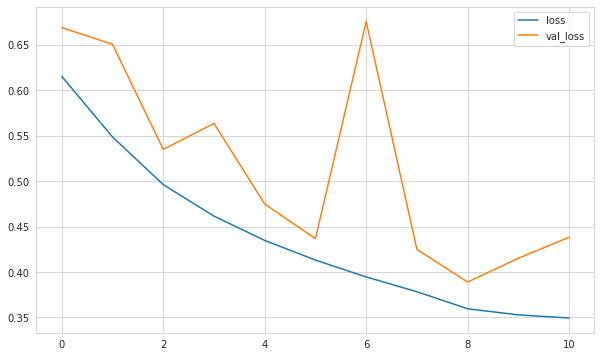

In [30]:
summary4 = pd.DataFrame(model4.history.history)
summary4[["loss", "val_loss"]].plot();

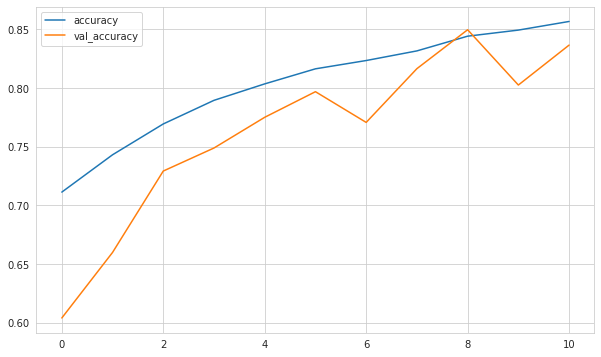

In [31]:
summary4[["accuracy", "val_accuracy"]].plot();

# Final Model

We take best score at model 4. So we continue with model 4, and its parameters

In [32]:
score = model4.evaluate(val_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

72/72 [==============================] - 10s 140ms/step - loss: 0.3889 - accuracy: 0.8498
Test loss: 0.38889503479003906
Test accuracy: 0.8497816324234009


In [33]:
val_image_gen = image_gen2.flow_from_directory(val_path,
                                              target_size=(128,128),
                                              color_mode='rgb',
                                              batch_size=32,
                                              class_mode='binary', shuffle=False, seed=42)

pred_probabilities = model4.predict(val_image_gen)
predictions = pred_probabilities > 0.5
print(predictions)
print(val_image_gen.classes)

Found 2290 images belonging to 2 classes.
[[False]
 [ True]
 [False]
 ...
 [ True]
 [ True]
 [ True]]
[0 0 0 ... 1 1 1]


In [34]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(val_image_gen.classes,predictions))
print("-----"*20)
print(classification_report(val_image_gen.classes,predictions))

[[1065  154]
 [ 190  881]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1219
           1       0.85      0.82      0.84      1071

    accuracy                           0.85      2290
   macro avg       0.85      0.85      0.85      2290
weighted avg       0.85      0.85      0.85      2290



In [35]:
from tensorflow.keras.models import load_model
model.save('cat_dog_cnn2.h5')

# Image Prediction

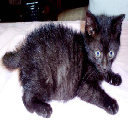

In [36]:
from PIL import Image
from tensorflow.keras.preprocessing import image

model=load_model('/kaggle/working/cat_dog_cnn2.h5')
img = image.load_img(test_path+"/10001.jpg", target_size=(128,128,3)) 
img   

In [37]:
img_array = np.array(img) 
img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 128, 128, 3)

In [41]:
np.argmax(model.predict(img_array))

0

In [39]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}